# GSPACER on non linear instances
Pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.display import display, HTML

    #Uses different commits: the binary submitted for cav and the refactored spacer


In [14]:
fname='mar9.csv'
csm = pd.read_csv(fname)
# move timeout and unknown to maximal time
csm['time'].fillna(value=900, inplace=True)
csm['result'].fillna(value="no-result-produced", inplace=True)
# show a snapshot of data for visual validation
csm.head()

,index,SPACER_cex_depth,SPACER_cluster_out_of_gas,SPACER_concretize,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_expand_pob_undef,SPACER_inductive_level,SPACER_max_cluster_size,...,time_spacer_solve,time_spacer_solve_propagate,time_spacer_solve_pt_must_reachable,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_global,time_spacer_solve_reach_gen_global_cvx_cls,time_spacer_solve_reach_is_reach
0,chc-lia-nonlin-0000.smt2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0.0,NaN,0.00,0.0,0.00,0.00,0.0,NaN,NaN
1,chc-lia-nonlin-0001.smt2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0.0,NaN,0.00,0.0,0.00,0.00,0.0,NaN,NaN
2,chc-lia-nonlin-0002.smt2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0.0,NaN,0.00,0.0,0.00,0.00,0.0,NaN,NaN
3,chc-lia-nonlin-0003.smt2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.01,0.0,NaN,0.00,0.0,0.00,NaN,NaN,NaN,0.0
4,chc-lia-nonlin-0004.smt2,NaN,NaN,4.0,1.0,1.0,NaN,7.0,3.0,2.0,...,0.09,0.0,NaN,0.06,0.0,0.01,0.01,0.0,NaN,0.0


In [15]:
# quick overview of solved/unsolved instances
csm[['result','index']].groupby(['result']).count()

,index
result,
no-result-produced,1
sat,155
timeout,11
unsat,117


In [16]:
csm.query('result == "no-result-produced"')[["index"]]

,index
91,chc-lia-nonlin-0091.smt2


For instance 0091, the error is thrown by the parser: (error "line 2 column 6124: unexpected character")

In [17]:
csm.query('result == "unknown"')[["index"]]

,index


# Comparison with base solver

In [18]:
fname = "base.csv"
base = pd.read_csv(fname)
base.rename(columns={"status":"result"}, inplace=True)
base['time'].fillna(value=900, inplace=True)
base['result'].fillna(value="no-result-produced", inplace=True)
base[['result','index']].groupby(['result']).count()

,index
result,
no-result-produced,1
sat,149
timeout,17
unsat,117


In [19]:
comb = pd.merge(csm, base, on = "index", how = "inner")
#sanity check. Make sure they don't disagree
comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas,SPACER_concretize,SPACER_conj,SPACER_conj_failed,SPACER_conj_success,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size,...,time_spacer_init_rules_y,time_spacer_init_rules_pt_init_y,time_spacer_mbp_y,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_pt_must_reachable_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_is_reach_y


In [20]:
comb[['result_x', 'result_y', 'index']].groupby(['result_x', 'result_y']).count()

index
result_x           result_y                 
no-result-produced no-result-produced      1
sat                sat                   149
                   timeout                 6
timeout            timeout                11
unsat              unsat                 117

In [21]:
#instances solved only by global spacer
comb.query('(result_x == "sat" & result_y != "sat")')[["index", "SPACER_max_depth_x","time_x"]]

,index,SPACER_max_depth_x,time_x
21,chc-lia-nonlin-0021.smt2,3.0,0.05
33,chc-lia-nonlin-0033.smt2,23.0,13.30
70,chc-lia-nonlin-0070.smt2,7.0,0.28
74,chc-lia-nonlin-0074.smt2,5.0,1.88
168,chc-lia-nonlin-0168.smt2,8.0,0.28
212,chc-lia-nonlin-0212.smt2,11.0,2.44


In [22]:
#instances that were solved at a lower depth by global spacer.
comb.query('(result_x == "sat" & result_y == "sat") & (SPACER_max_depth_y > SPACER_max_depth_x )')[["index", "SPACER_max_depth_x","time_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,time_x,SPACER_max_depth_y
35,chc-lia-nonlin-0035.smt2,101.0,99.15,102.0
85,chc-lia-nonlin-0085.smt2,15.0,0.62,16.0
86,chc-lia-nonlin-0086.smt2,99.0,86.68,101.0
94,chc-lia-nonlin-0094.smt2,17.0,5.02,28.0
102,chc-lia-nonlin-0102.smt2,5.0,0.23,9.0
117,chc-lia-nonlin-0117.smt2,8.0,0.25,12.0
119,chc-lia-nonlin-0119.smt2,8.0,0.26,17.0
120,chc-lia-nonlin-0120.smt2,8.0,0.26,22.0
121,chc-lia-nonlin-0121.smt2,8.0,0.27,27.0
148,chc-lia-nonlin-0148.smt2,8.0,0.56,10.0


In [23]:
#the gspacer had to search deeper to find the inductive invariant
comb[((comb["result_x"] == "sat") & (comb["result_y"] == "sat") & (comb["SPACER_max_depth_x"] > comb["SPACER_max_depth_y"] ))][["index", "SPACER_max_depth_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y
7,chc-lia-nonlin-0007.smt2,62.0,9.0
77,chc-lia-nonlin-0077.smt2,18.0,13.0
133,chc-lia-nonlin-0133.smt2,12.0,11.0
134,chc-lia-nonlin-0134.smt2,15.0,14.0
135,chc-lia-nonlin-0135.smt2,18.0,16.0
155,chc-lia-nonlin-0155.smt2,8.0,7.0
158,chc-lia-nonlin-0158.smt2,7.0,6.0


In [24]:
#solved at the same depth
comb[((comb["result_x"] == "sat") & (comb["result_y"] == "sat") & (comb["SPACER_max_depth_x"] == comb["SPACER_max_depth_y"]) & (comb["SPACER_max_depth_x"] > 20))][["index", "SPACER_max_depth_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y
112,chc-lia-nonlin-0112.smt2,22.0,22.0
206,chc-lia-nonlin-0206.smt2,21.0,21.0
255,chc-lia-nonlin-0255.smt2,34.0,34.0
257,chc-lia-nonlin-0257.smt2,25.0,25.0
258,chc-lia-nonlin-0258.smt2,25.0,25.0
282,chc-lia-nonlin-0282.smt2,41.0,41.0


In [25]:
comb.query('result_x == "sat" & SPACER_max_depth_x == "NaN"')[["index", "result_x", "result_y", "time_x"]]

,index,result_x,result_y,time_x
12,chc-lia-nonlin-0012.smt2,sat,sat,0.00
13,chc-lia-nonlin-0013.smt2,sat,sat,0.00
14,chc-lia-nonlin-0014.smt2,sat,sat,0.00
22,chc-lia-nonlin-0022.smt2,sat,sat,0.00
89,chc-lia-nonlin-0089.smt2,sat,sat,0.00
114,chc-lia-nonlin-0114.smt2,sat,sat,0.00
192,chc-lia-nonlin-0192.smt2,sat,sat,0.00
201,chc-lia-nonlin-0201.smt2,sat,sat,0.01


They were solved before hitting spacer

len(A): 155 	len(B): 149
No. values 149
Min val, A: 1.0 	B: 1.0
Max val, A: 101.0 	B: 102.0
Avg val, A: 8.04 	B: 8.13


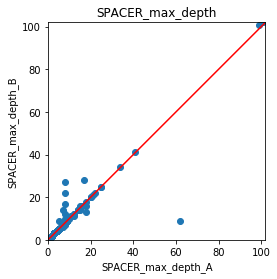

In [26]:
def preprocess(df, sat):  
    if sat == True:
        return df.query('result == "sat"')
    else:
        return df.query('result == "unsat"')
        
def compare_values(columns, df_A, df_B):
    vals_A = df_A[['index'] + list(columns)]
    vals_B = df_B[['index'] + list(columns)]
    merged = vals_A.merge(vals_B, how='inner', left_index=True, on='index')
    return merged

def scatter_values(column, df_A, df_B):
    vals = compare_values((column, ), df_A, df_B)
    xlabel = column + '_x'
    ylabel = column + '_y'
    
    xs = vals[xlabel]
    ys = vals[ylabel]
    
    print('len(A):', len(df_A), '\tlen(B):', len(df_B))
    print('No. values', len(xs))
    print('Min val, A:', min(xs), '\tB:', min(ys))
    print('Max val, A:', max(xs), '\tB:', max(ys))
    print('Avg val, A:', "{:0.2f}".format(np.mean(xs)), '\tB:', "{:0.2f}".format(np.mean(ys)))
    
    min_val = min(0, min(xs), min(ys))
    max_val = max(max(xs), max(ys))
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    plt.scatter(xs, ys)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(column + '_A')
    plt.ylabel(column + '_B')
    
    mid_x = np.linspace(min_val, max_val, 2)
    mid_y = mid_x
    plt.plot(mid_x, mid_y, 'r-')
    plt.title(column)
    
    plt.rcParams['figure.dpi'] = 160
    plt.draw()
    

chc_csm = preprocess(csm, True)
chc_base = preprocess(base, True)

scatter_values('SPACER_max_depth', chc_csm, chc_base)

len(A): 160 	len(B): 149
No. values 149
Min val, A: 0.0 	B: 0.0
Max val, A: 123.6 	B: 77.91
Avg val, A: 3.71 	B: 3.35


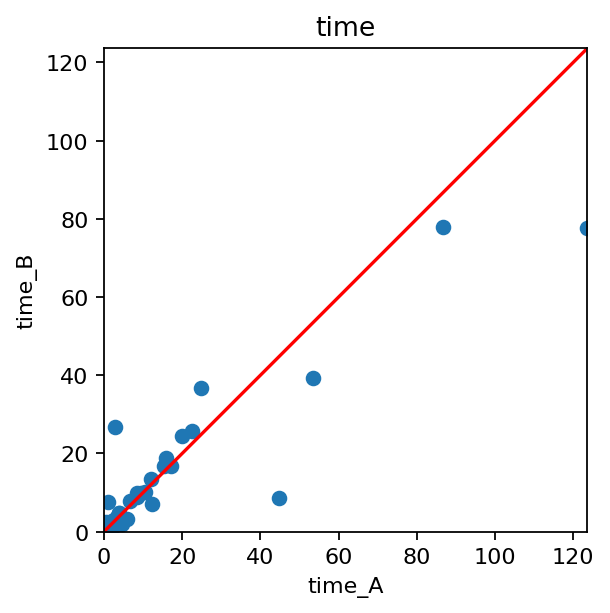

In [70]:
scatter_values('time', chc_csm, chc_base)

# Comparison with no interpolation

In [27]:
fname = "mar9-no-iuc.csv"
csmnoiuc = pd.read_csv(fname)
csmnoiuc.rename(columns={"status":"result"}, inplace=True)
csmnoiuc['time'].fillna(value=900, inplace=True)
csmnoiuc['result'].fillna(value="no-result-produced", inplace=True)
csmnoiuc[['result','index']].groupby(['result']).count()

,index
result,
no-result-produced,1
sat,154
timeout,12
unsat,117


In [28]:
comb = pd.merge(csm, csmnoiuc, on = "index", how = "inner")
#sanity check. Make sure they don't disagree
comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cex_depth_x,SPACER_cluster_out_of_gas_x,SPACER_concretize_x,SPACER_conj_x,SPACER_conj_failed_x,SPACER_conj_success_x,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size_x,...,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_pt_must_reachable_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_cluster_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_gen_global_y,time_spacer_solve_reach_gen_global_cvx_cls_y,time_spacer_solve_reach_is_reach_y


In [29]:
comb[['result_x', 'result_y', 'index']].groupby(['result_x', 'result_y']).count()

index
result_x           result_y                 
no-result-produced no-result-produced      1
sat                sat                   153
                   timeout                 2
timeout            sat                     1
                   timeout                10
unsat              unsat                 117

In [30]:
#instances solved only with interpolation
comb.query('(result_x == "sat" & result_y != "sat")')[["index", "SPACER_max_depth_x","time_x", "SPACER_need_sage_y"]]

,index,SPACER_max_depth_x,time_x,SPACER_need_sage_y
21,chc-lia-nonlin-0021.smt2,3.0,0.05,NaN
94,chc-lia-nonlin-0094.smt2,17.0,5.02,NaN


In [31]:
#instances that were solved at a lower depth when using interpolation
comb.query('(result_x == "sat" & result_y == "sat") & (SPACER_max_depth_y > SPACER_max_depth_x )')[["index", "SPACER_max_depth_x","time_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,time_x,SPACER_max_depth_y
49,chc-lia-nonlin-0049.smt2,2.0,0.03,4.0
74,chc-lia-nonlin-0074.smt2,5.0,1.88,11.0
83,chc-lia-nonlin-0083.smt2,1.0,0.08,3.0
86,chc-lia-nonlin-0086.smt2,99.0,86.68,100.0
93,chc-lia-nonlin-0093.smt2,1.0,0.03,2.0
96,chc-lia-nonlin-0096.smt2,5.0,0.15,11.0
121,chc-lia-nonlin-0121.smt2,8.0,0.27,9.0
125,chc-lia-nonlin-0125.smt2,2.0,0.03,3.0
168,chc-lia-nonlin-0168.smt2,8.0,0.28,10.0
174,chc-lia-nonlin-0174.smt2,8.0,1.15,14.0


In [32]:
#interpolation had to search deeper to find the inductive invariant
comb[((comb["result_x"] == "sat") & (comb["result_y"] == "sat") & (comb["SPACER_max_depth_x"] > comb["SPACER_max_depth_y"] ))][["index", "SPACER_max_depth_x", "SPACER_max_depth_y"]]

,index,SPACER_max_depth_x,SPACER_max_depth_y
4,chc-lia-nonlin-0004.smt2,6.0,5.0
5,chc-lia-nonlin-0005.smt2,4.0,3.0
7,chc-lia-nonlin-0007.smt2,62.0,12.0
33,chc-lia-nonlin-0033.smt2,23.0,15.0
38,chc-lia-nonlin-0038.smt2,5.0,3.0
72,chc-lia-nonlin-0072.smt2,4.0,2.0
73,chc-lia-nonlin-0073.smt2,4.0,2.0
77,chc-lia-nonlin-0077.smt2,18.0,12.0
92,chc-lia-nonlin-0092.smt2,4.0,1.0
102,chc-lia-nonlin-0102.smt2,5.0,4.0


len(A): 155 	len(B): 154
No. values 153
Min val, A: 1.0 	B: 1.0
Max val, A: 101.0 	B: 101.0
Avg val, A: 8.08 	B: 7.70


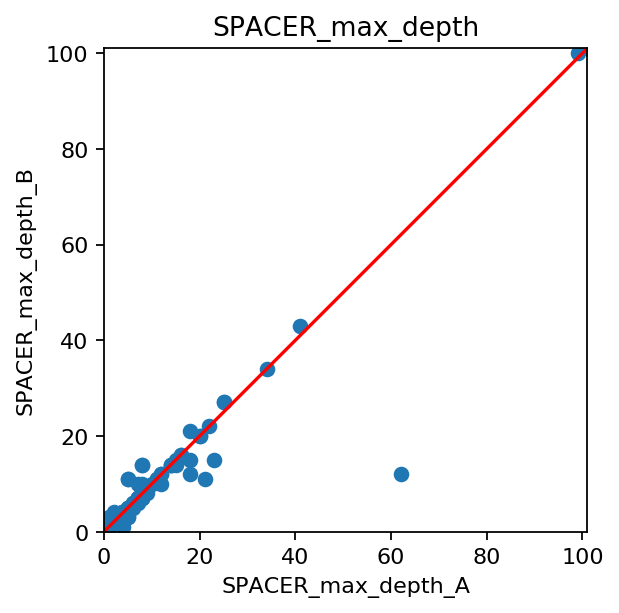

In [33]:
chc_csm = preprocess(csm, True)
chc_csm_no_iuc = preprocess(csmnoiuc, True)

scatter_values('SPACER_max_depth', chc_csm, chc_csm_no_iuc)

len(A): 155 	len(B): 154
No. values 153
Min val, A: 0.0 	B: 0.0
Max val, A: 558.08 	B: 339.18
Avg val, A: 7.14 	B: 5.79


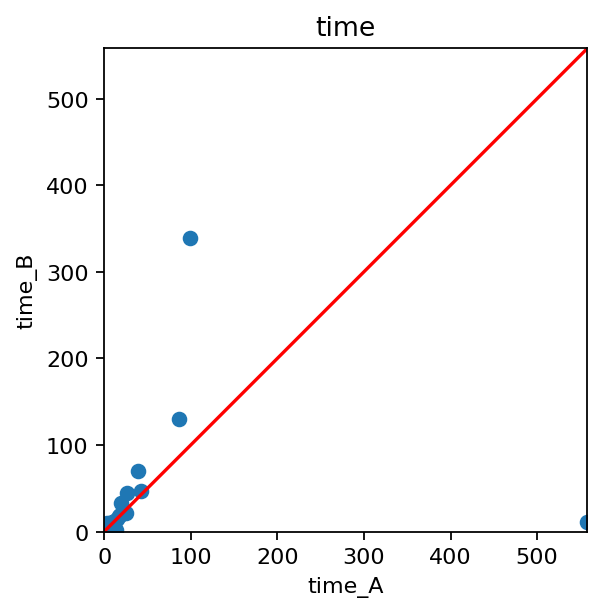

In [34]:
scatter_values('time', chc_csm, chc_csm_no_iuc)